# Using Classification Methods on Twitter Airline Sentiments`

This assignment is about using ML Classification Methods to predict whether a Airline had positive, negative, or neutral sentiments when a person tweeted at an airline. 

In [1]:
import pandas as pd

df = pd.read_csv('Tweets.csv', encoding='utf-8')
df.head(5)

,text,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone
0,@VirginAmerica What @dhepburn said.,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,@VirginAmerica plus you've added commercials t...,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,@VirginAmerica it's really aggressive to blast...,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,@VirginAmerica and it's a really big bad thing...,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [2]:
df.shape

(14640, 14)

In [3]:
#grouping the airline's sentiment
t_gb = df.groupby(["airline", "airline_sentiment" ]).count()["name"]
t_gb

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: name, dtype: int64

In [4]:
sentiments_count=df['airline_sentiment'].value_counts()
sentiments_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5,0,'Sentiments')

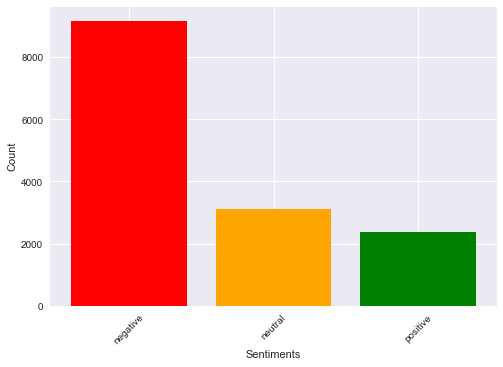

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

mpl.style.use('seaborn')

index = [1,2,3]
plt.bar(index,sentiments_count,color=['red', 'orange', 'green'])
plt.xticks(index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Count')
plt.xlabel('Sentiments')

In [6]:
#resseting indexing and formatting to column view
df_airlineSentiment = t_gb.to_frame().reset_index()
df_airlineSentiment.columns = ["airline", "airline_sentiment", "count"]
dff = df_airlineSentiment
dff

,airline,airline_sentiment,count
0,American,negative,1960
1,American,neutral,463
2,American,positive,336
3,Delta,negative,955
4,Delta,neutral,723
5,Delta,positive,544
6,Southwest,negative,1186
7,Southwest,neutral,664
8,Southwest,positive,570
9,US Airways,negative,2263


In [7]:
print("Total Positive Sentiment for United Airline is", t_gb['United','positive'])

Total Positive Sentiment for United Airline is 492


In [8]:
print("Total Negative Sentiment for Delta Airline is", t_gb['Delta','negative'])

Total Negative Sentiment for Delta Airline is 955


In [9]:
def sentiment_graph(Airline):
    df2=df[df['airline']==Airline]
    count=df2['airline_sentiment'].value_counts()
    index = [1,2,3]
    plt.bar(index,count,color=['red', 'orange', 'green'])
    plt.xticks(index,['negative','neutral','positive'])
    plt.ylabel('Count')
    plt.xlabel('Sentiments')
    plt.title('Count of Sentiments of '+Airline)

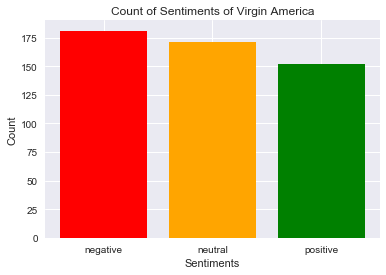

In [10]:
sentiment_graph('Virgin America')

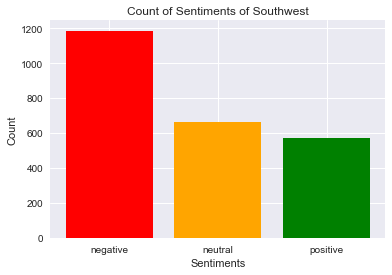

In [11]:
sentiment_graph('Southwest')

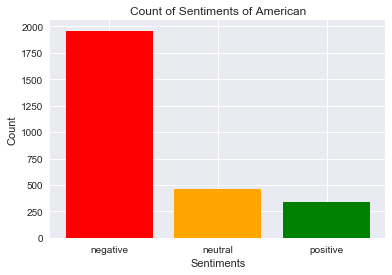

In [12]:
sentiment_graph('American')

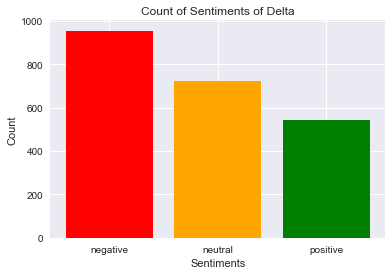

In [13]:
sentiment_graph('Delta')

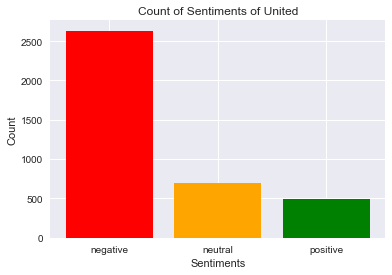

In [14]:
sentiment_graph('United')

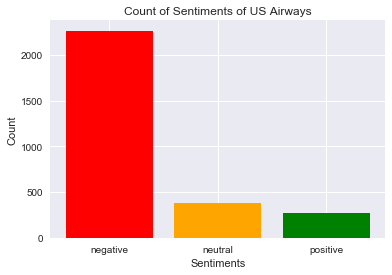

In [15]:
sentiment_graph('US Airways')

In [16]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [17]:
np.set_printoptions(precision=2)

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True, 
                         norm='l2', 
                         smooth_idf=True)

In [19]:
df.loc[0, 'text']

'@VirginAmerica What @dhepburn said.'

In [20]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [21]:
preprocessor(df.loc[0, 'text'])

' virginamerica what dhepburn said '

In [22]:
df['text'] = df['text'].apply(preprocessor)

In [23]:
#import Natural Lanuage Toolkit 
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()
def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [24]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from sklearn.cross_validation import train_test_split
train,test = train_test_split(df,test_size=0.3,random_state=0)

X_train = train.iloc[:,0].values
y_train = train.iloc[:,1].values
X_test = test.iloc[:,0].values
y_test = test.iloc[:,1].values

In [27]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__stop_words': [stop, None]},
              ]

In [29]:
#Testing Logistic Regression Accuracy
lr_tfidf = Pipeline([('vect', tfidf),
                    ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1)

gs_lr_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.6min finished


Best parameter set: {'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x000001D1F647B730>} 
CV Accuracy: 0.793


In [30]:
#Testing RandomForrest Accuracy
rf_tfidf = Pipeline([('vect', tfidf),
                    ('rf_classifier', RandomForestClassifier(random_state=0))])

gs_rf_tfidf = GridSearchCV(rf_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1)

gs_rf_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_rf_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_rf_tfidf.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.2min finished


Best parameter set: {'vect__ngram_range': (1, 1), 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'som

In [31]:
#Testing SGD Accuracy
sgd_tfidf = Pipeline([('vect', tfidf),
                    ('sgd', SGDClassifier(random_state=0))])

gs_sgd_tfidf = GridSearchCV(sgd_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1)

gs_sgd_tfidf.fit(X_train, y_train)

print('Best parameter set: %s ' % gs_sgd_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_sgd_tfidf.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

Best parameter set: {'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x000001D1F647B488>} 
CV Accuracy: 0.807


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [32]:
#Using SGD Classifier since it has the highest accuracy tested
clf = gs_sgd_tfidf.best_estimator_

In [33]:
clf.predict(X_test)

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'neutral'], dtype='<U8')

In [34]:
example = ['I hate this flight!']
clf.predict(example)

array(['negative'], dtype='<U8')

In [35]:
example = ['poor services']
clf.predict(example)

array(['negative'], dtype='<U8')

In [36]:
example = ['I love Delta']
clf.predict(example)

array(['positive'], dtype='<U8')

In [37]:
import pickle
mypickle_path = 'flightPickle.pkl'
flightpickle = open(mypickle_path, 'wb')
pickle.dump(clf, flightpickle)
flightpickle.close()

In [38]:
mypickle_path = 'flightPickle.pkl'
model_unpickle = open(mypickle_path, 'rb')
clf_new = pickle.load(model_unpickle)

In [39]:
example = ['I enjoyed my flight!']
clf_new.predict(example)

array(['neutral'], dtype='<U8')